In [25]:
#impoting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
# reading the iris dataset using pandas
df = pd.read_csv('Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [36]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
x =iris_df.iloc[:,[0,1,2,3]].values

In [37]:
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
iris_df.info()
iris_df.iloc[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [30]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans= KMeans(n_clusters = i, init ="k-means++" , max_iter = 300, n_init = 19,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

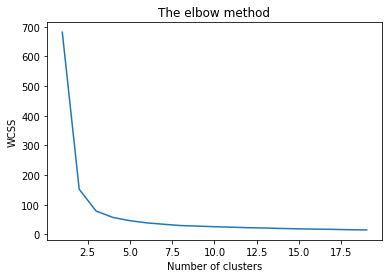

In [31]:
# Using the elbow method to determine the optimal number of clusters for k-means clustering
plt.plot(range(1,20),wcss)
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("WCSS") #within cluster sum of squares
plt.show()

In [32]:
# Implementing K-Means Clustering
kmeans = KMeans(n_clusters = 3,init="k-means++" ,max_iter = 300 , n_init = 19,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

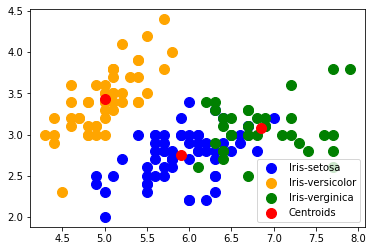

In [33]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s=100,c="blue",label="Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans ==1,1],s = 100,c="orange",label="Iris-versicolor")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,c="green",label = "Iris-verginica")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="Centroids")
plt.legend()

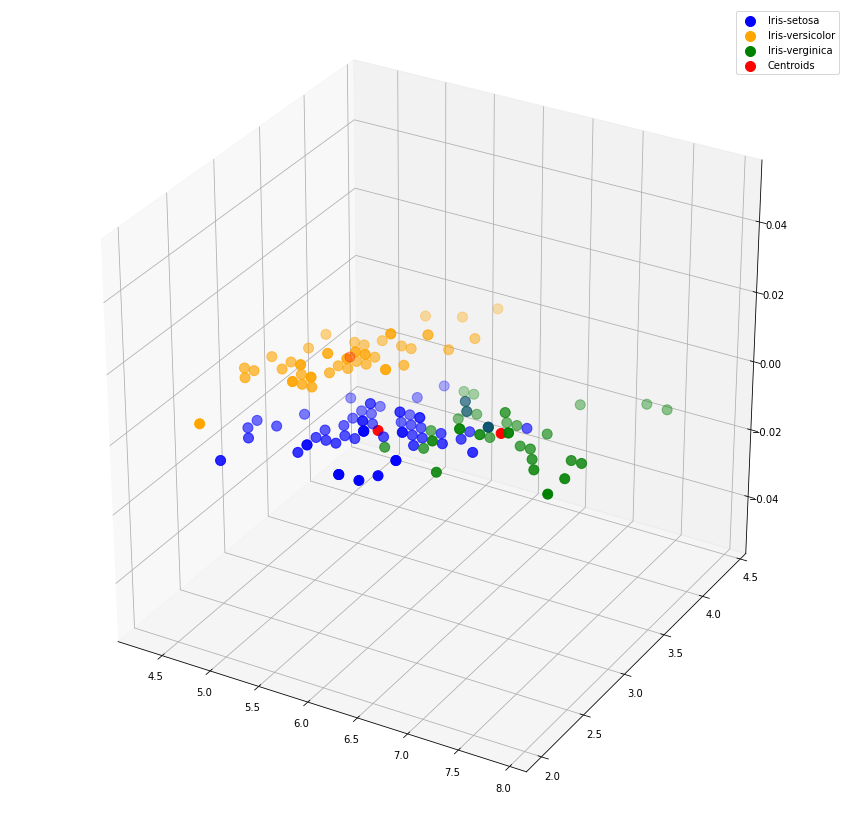

In [38]:
# 3d scatterplot using matplotlib
fig= plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = "3d")
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s=100,c="blue",label="Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans ==1,1],s = 100,c="orange",label="Iris-versicolor")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,c="green",label = "Iris-verginica")
# 3d scatterplot using matplotlib
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="Centroids")
plt.legend()
plt.show()